# The Iris Data Set

## The Most Famous Dataset

> This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day.
          — [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)


In [1]:
import matplotlib.pyplot as plt
from patsy import dmatrices
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

> The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.
          — [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)



In [2]:
IRIS = load_iris()

In [3]:
type(IRIS.data)

numpy.ndarray

In [4]:
IRIS.data.shape

(150, 4)

#### What does `.shape` do?

### Dataframes

We will load the Iris data into a dataframe for ease of manipulation.

In [5]:
iris_df = pd.DataFrame(IRIS.data, columns=IRIS.feature_names)

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Pair Plot

We will use Searborn to prepare a **Pair Plot** of the Iris dataset. A Pair Plot is an array of scatter plots, one for each pair of features in the data. Rather than plotting a feature against itself, the diagonal is rendered as a **probability distribution** of the given feature.


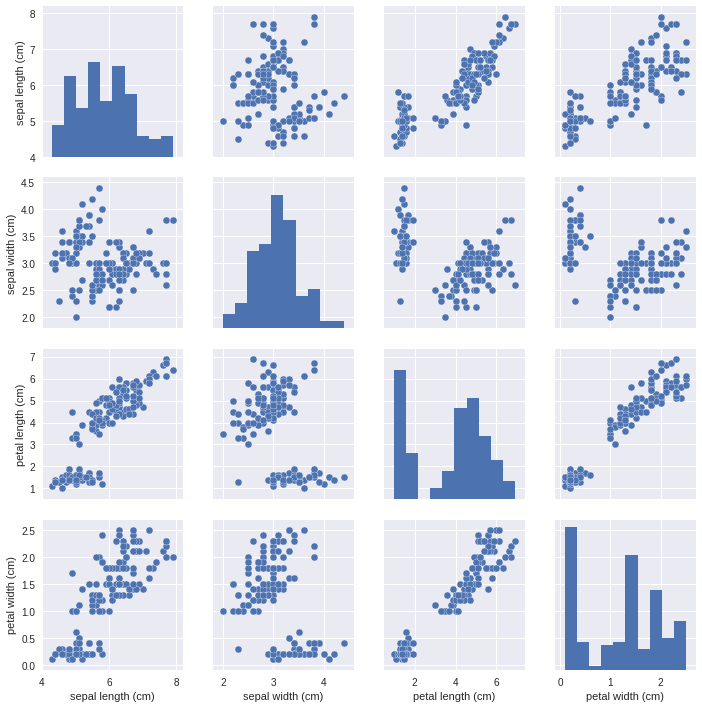

In [7]:
sns.pairplot(iris_df)

### Remove Unit and White Space from Feature Name

Here we use a list comprehension to change the feature names:

In [8]:
IRIS.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris_features_names = IRIS.feature_names
iris_features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
def remove_unit_and_white_space(feature_name):
    feature_name = feature_name.replace(' (cm)','')
    feature_name = feature_name.replace(' ', '_')
    return feature_name

In [11]:
iris_features_names = [remove_unit_and_white_space(name)for name in iris_features_names]

In [12]:
iris_features_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [13]:
iris_df.columns = iris_features_names
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Export to CSV

Ultimately, we will export a CSV of the dataframe to disk. This will make it easy to access the same data from both Python and R.


In [14]:
%ls

02-01-iris.ipynb         02-05-probabilistic-model-selection.ipynb
02-02-learning.ipynb     02-06-cluster-modeling.ipynb
02-03-sampling.ipynb     Untitled3.ipynb
02-04-probability.ipynb


In [15]:
%mkdir -p data

In [16]:
%ls

02-01-iris.ipynb         02-05-probabilistic-model-selection.ipynb
02-02-learning.ipynb     02-06-cluster-modeling.ipynb
02-03-sampling.ipynb     data/
02-04-probability.ipynb  Untitled3.ipynb


In [17]:
iris_df.to_csv('data/iris.csv')

### The Train-Test Split

Of course, we will not have access to the new data we will use at the time of fitting the model. We will have to simulate new data in some way. We do this, by creating **test** data using some fraction of the original data we started with.

![](doc/img/ttspl.png)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
target, features = dmatrices("petal_width ~ petal_length", iris_df)

Of course, we will not have access to the new data we will use at the time of fitting the model. We will have to simulate new data in some way. We do this, by creating **test** data using some fraction of the original data we started with.

In [20]:
(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, random_state=42) 

In [21]:
(features_train.shape,
 target_train.shape,
 features_test.shape,
 target_test.shape)

((112, 2), (112, 1), (38, 2), (38, 1))

In [22]:
features_test[:5]

array([[ 1. ,  4.7],
       [ 1. ,  1.7],
       [ 1. ,  6.9],
       [ 1. ,  4.5],
       [ 1. ,  4.8]])

In [23]:
linear_regression_model = LinearRegression(fit_intercept=False)

linear_regression_model.fit(features_train, target_train)

petal_width_prediction_1_var = (linear_regression_model
                                .predict(features_test))

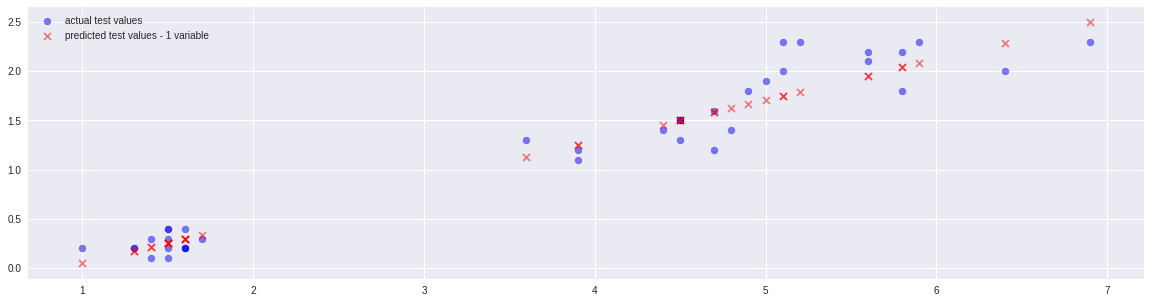

In [24]:
plt.figure(1, (20,5))

plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, 
            label='actual test values')
plt.scatter(features_test[:, 1], petal_width_prediction_1_var,
            marker='x', color='red', alpha=0.5, 
            label='predicted test values - 1 variable')
plt.legend()

### Multicollinearity

#### How is the prediction affected by adding additional predictor variables?

In [25]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression

In [26]:
from sklearn.model_selection import train_test_split

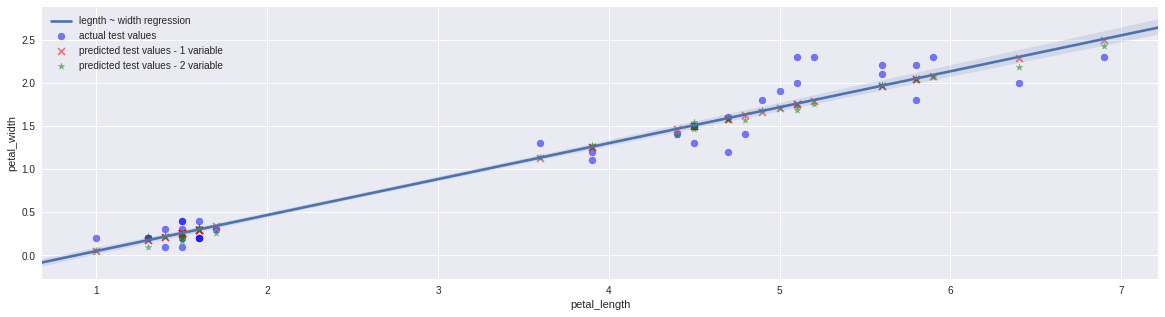

In [27]:
target, features = dmatrices("petal_width ~ petal_length + sepal_length", iris_df)

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, random_state=42) 

linear_regression_model = LinearRegression(fit_intercept=False)

linear_regression_model.fit(features_train, target_train)

petal_width_prediction_2_var = linear_regression_model.predict(features_test)

plt.figure(1, (20,5))


plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, label='actual test values')
plt.scatter(features_test[:, 1], petal_width_prediction_1_var,
            marker='x', color='red', alpha=0.5, label='predicted test values - 1 variable')
plt.scatter(features_test[:, 1], petal_width_prediction_2_var,
            marker='*', color='green', alpha=0.5, label='predicted test values - 2 variable')
sns.regplot('petal_length', 'petal_width', data=iris_df, scatter=False, label='legnth ~ width regression')
plt.legend()

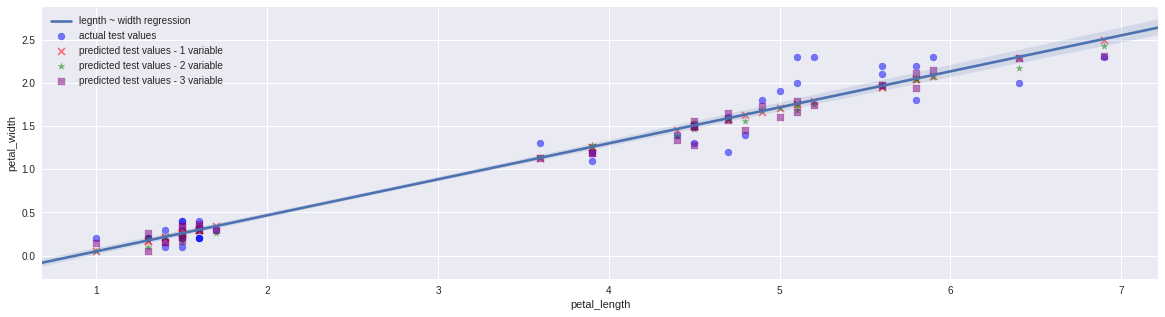

In [28]:
target, features = dmatrices("petal_width ~ petal_length + sepal_length + sepal_width", iris_df)

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, random_state=42) 

linear_regression_model = LinearRegression(fit_intercept=False)

linear_regression_model.fit(features_train, target_train)
petal_width_prediction_3_var = linear_regression_model.predict(features_test)

plt.figure(1, (20,5))

plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, label='actual test values')
plt.scatter(features_test[:, 1], petal_width_prediction_1_var,
            marker='x', color='red', alpha=0.5, label='predicted test values - 1 variable')
plt.scatter(features_test[:, 1], petal_width_prediction_2_var,
            marker='*', color='green', alpha=0.5, label='predicted test values - 2 variable')
plt.scatter(features_test[:, 1], petal_width_prediction_3_var,
            marker='s', color='purple', alpha=0.5, label='predicted test values - 3 variable')
sns.regplot('petal_length', 'petal_width', data=iris_df, scatter=False, label='legnth ~ width regression')

plt.legend()

In [29]:
x_values = features_test[:, 1]
y_values = target_test
y_hat_1_values = petal_width_prediction_1_var
y_hat_2_values = petal_width_prediction_2_var
y_hat_3_values = petal_width_prediction_3_var

y_hat = (y_hat_1_values, y_hat_2_values, y_hat_3_values)

points = list(zip(x_values, y_values, y_hat_1_values, y_hat_2_values, y_hat_3_values))

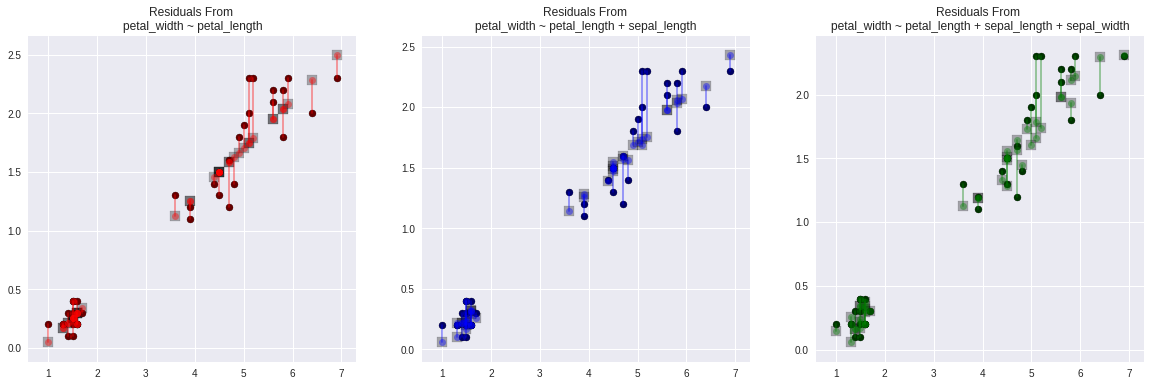

In [30]:
_, ax = plt.subplots(1,3,figsize=(20,6))

for point in points:
    x, y, y_hat_1, y_hat_2, y_hat_3 = point
    ax[0].plot([x,x], [y,y_hat_1], 'ro-', alpha=0.4)
    ax[0].set_title('Residuals From \npetal_width ~ petal_length')
    ax[1].plot([x,x], [y,y_hat_2], 'bo-', alpha=0.4)
    ax[1].set_title('Residuals From \npetal_width ~ petal_length + sepal_length')
    ax[2].plot([x,x], [y,y_hat_3], 'go-', alpha=0.4)
    ax[2].set_title('Residuals From \npetal_width ~ petal_length + sepal_length + sepal_width')

for i, a in enumerate(ax):    
    a.scatter(features_test[:, 1],
              target_test, marker='o', color='black')
    a.scatter(features_test[:, 1],
              y_hat[i], marker='s', s=100, alpha=0.3, color='black')


### Using PCA to Plot Multidimensional Data in Two Dimensions

PCA is a complex and very powerful model typically used for dimensionality reduction. We will explore this model in greater detail later, but for now there is one application that is so useful that we will skip the details and just use it.

In [31]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rc('figure', figsize=(20, 6))

#### High-Dimensional Data

The Iris data we are looking at is an example of high-dimensional data. Actually, it is the smallest number of dimensions that we can really think of as "high-dimensional". You can easily imagine how to visualize data in one, two, or three dimensions, but as soon there is a fourth dimension, this becomes much more challenging. 

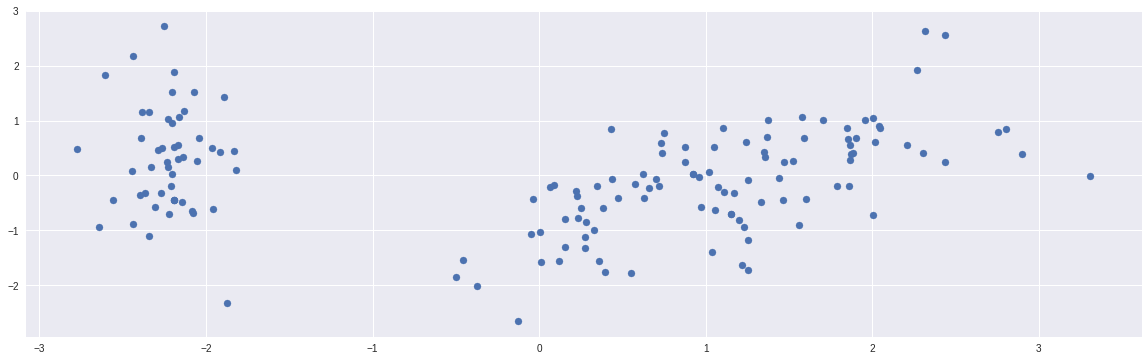

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

features_scaled = StandardScaler().fit_transform(IRIS.data)
iris_2d = pca.fit_transform(features_scaled)
plt.scatter(iris_2d[:, 0], iris_2d[:, 1])

Here, we have used PCA to reduce the dimensionality of our dataset from 4 to 2. Obviously, we have lost information, but this is okay. The purpose of running this algorithm is not to generate predictions, but to help us to visualize the data. At this, it was successful!

#### Coloring by Target

In [33]:
labels = IRIS.target_names
labels

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [34]:
named_target = np.array([labels[n] for n in IRIS.target])

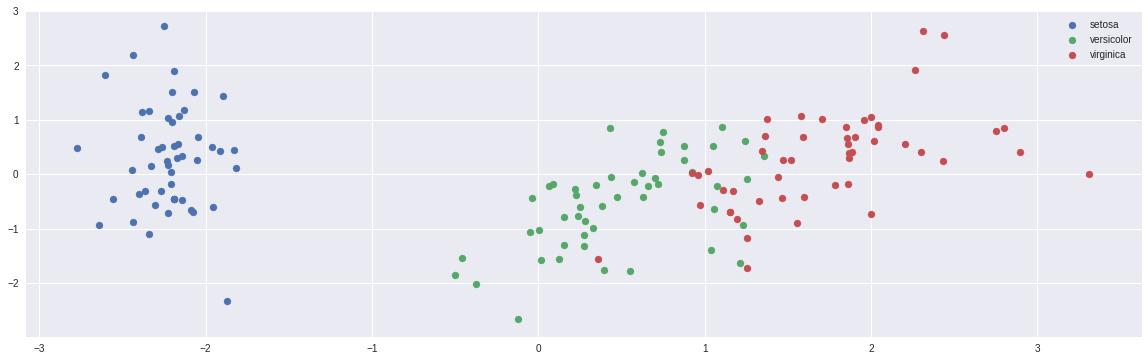

In [35]:
for label in labels:
    group_mask = named_target == label
    group = iris_2d[group_mask]
    plt.scatter(group[:, 0], group[:, 1], label=label)
plt.legend()